In [3]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
%matplotlib inline

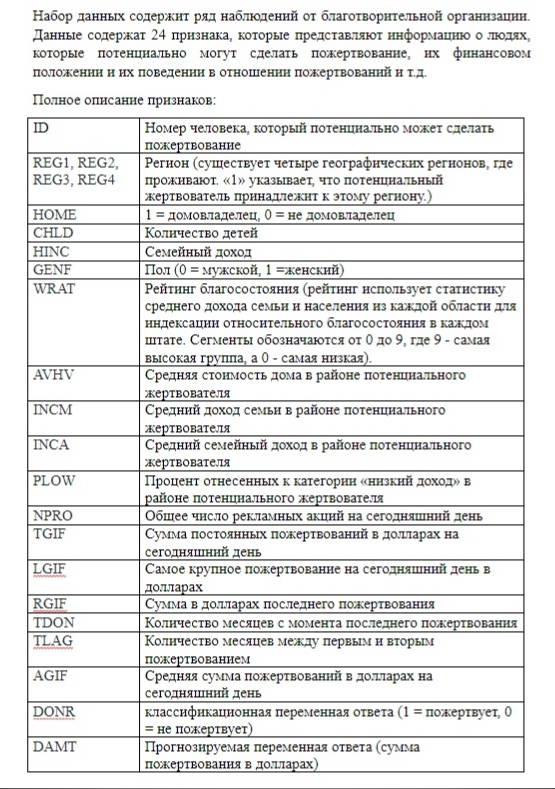

In [2]:
df_train = pd.read_csv('Train_chr_data.csv')

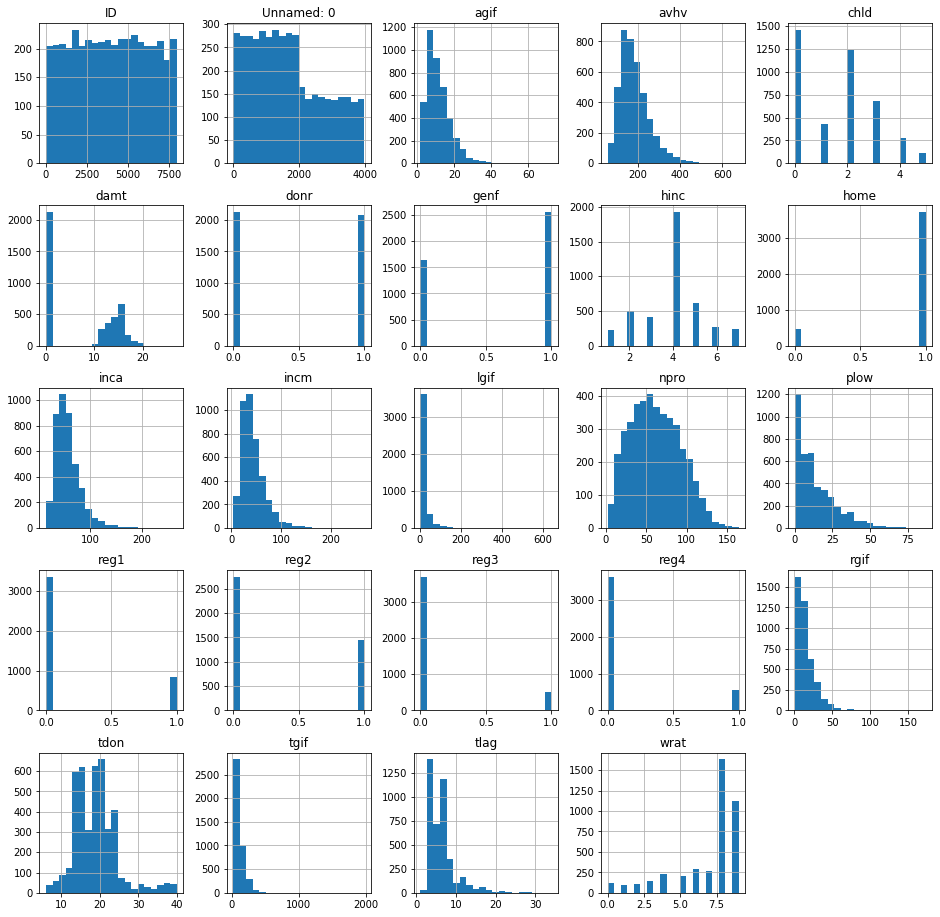

In [4]:
df_train.hist(figsize=(16,16), bins=20);

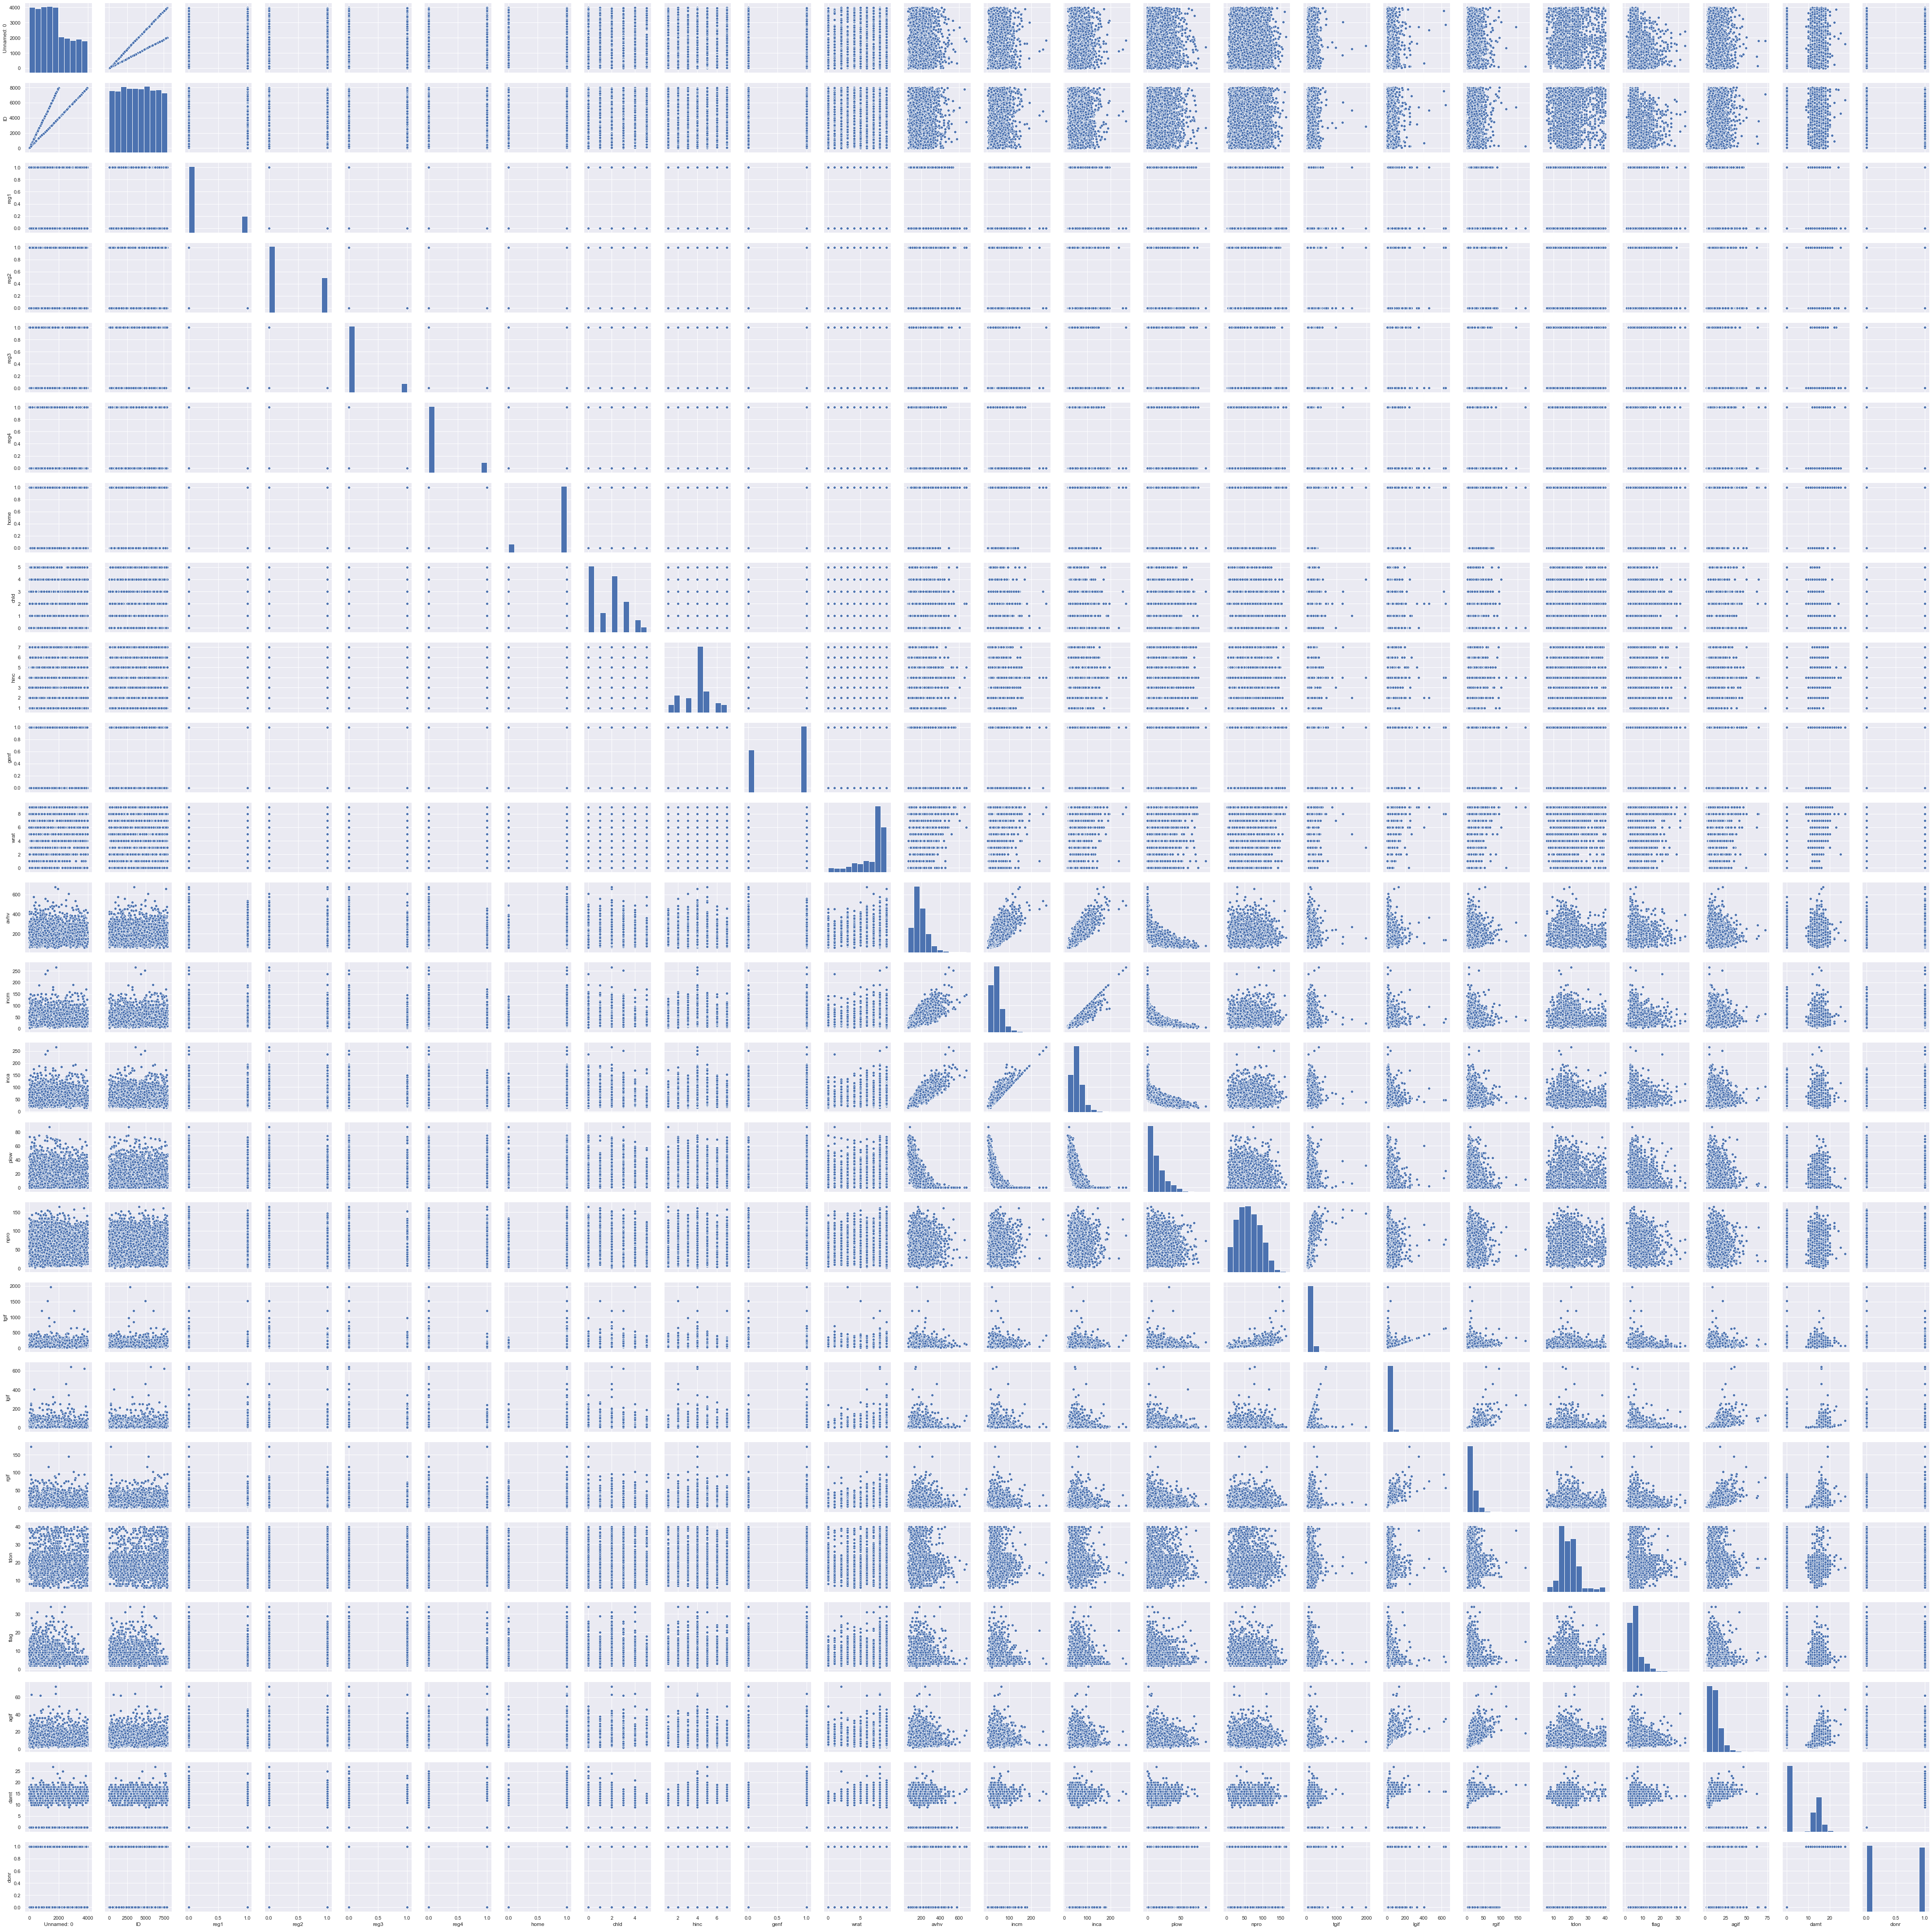

In [6]:
sns.set()
sns.pairplot(df_train, height = 2.5)
plt.show()

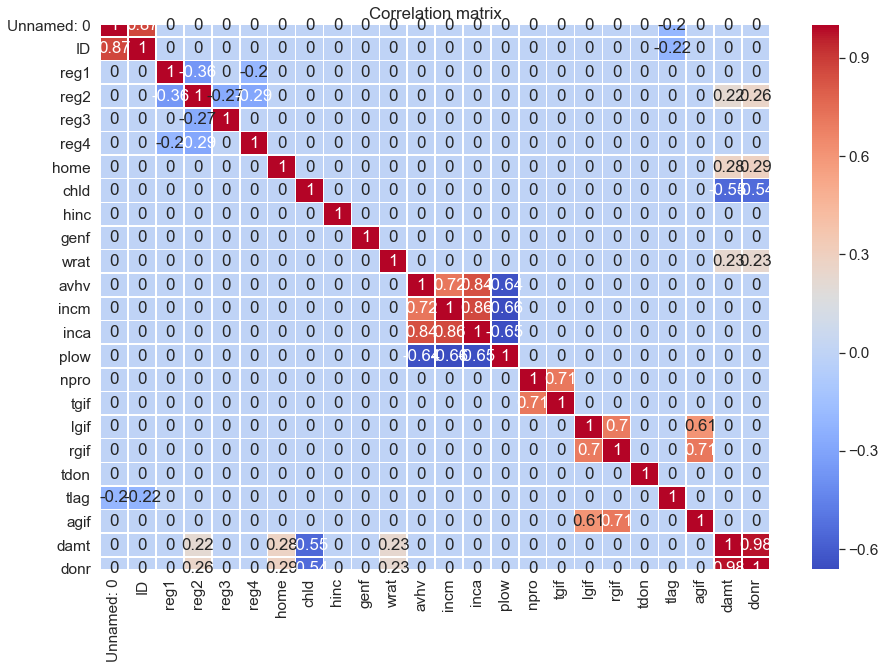

In [7]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_train.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0  # Проверьте, что будет если убрать маленькие корреляции

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [4]:
X = df_train.drop('donr', axis=1)
y = df_train[['ID', 'donr']]

In [5]:
regr = linear_model.LinearRegression()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
y_train['donr'].values

array([0., 0., 1., ..., 1., 1., 0.])

In [8]:
regr.fit(X_train, y_train['donr'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = regr.predict(X_test)

In [12]:
for i in range(0, len(y_pred)):
    y_pred[i] = 0 if y_pred[i] < 0.5 else 1
y_pred   

array([0., 0., 0., ..., 1., 0., 1.])

In [13]:
y_test['donr'].values

array([0., 0., 0., ..., 1., 0., 1.])

## Здесь мы строим матрицу запутанности - это один из способов оценки качества классификации

In [14]:
confusion_matrix(y_test['donr'], y_pred)

array([[639,   0],
       [  0, 622]], dtype=int64)

## Что такое матрица "запутанности"?

Предположим у вас есть два класса: 0 и 1. 
В левом верхнем углу количество объектов 0 класса, которые программа определила, как относящиеся к 0 классу.
В правом нижнем - тоже самое, но для 1 класса. 

В оставшихся позициях: смешанные состояния. 

## Задание

Полученный выше результат показывает асбоютную точность классификации. Все объекты нулевого класса определены как нулевой класс. Все объекты первого класса определены как первый класс. 

Почему так произошло? 